In [1]:
import pandas as pd
import numpy as np

In [38]:
data = pd.read_csv("../raw_data/data_merged_v1.csv", low_memory=False)
data.head(5)

,Organization Name,Organization Name URL,IPO Status,Company Type,Last Funding Type,Industries,Headquarters Location,Founded Date,Founded Date Precision,Full Description,...,Corporate Round,Post-IPO Debt,Non-equity Assistance,Equity Crowdfunding,Debt Financing,Secondary Market,Convertible Note,Product Crowdfunding,Post-IPO Secondary,Initial Coin Offering
0,air up,https://www.crunchbase.com/organization/air-up,Private,For Profit,Venture - Series Unknown,"Consumer, Food and Beverage, Retail","Munich, Bayern, Germany",2018-01-01,year,Air up is a provider of drinking bottle system...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,infinite roots,https://www.crunchbase.com/organization/mushlabs,Private,For Profit,Series B,"Biotechnology, Food and Beverage, Health Care","Hamburg, Hamburg, Germany",2018-01-01,year,Infinite Roots is a technology-driven company ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,instagrid,https://www.crunchbase.com/organization/instagrid,Private,For Profit,Series C,"Battery, Energy Storage, Manufacturing","Stuttgart, Baden-Wurttemberg, Germany",2018-01-01,year,Instagrid offers portable battery systems to c...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,isar aerospace,https://www.crunchbase.com/organization/isar-a...,Private,For Profit,Series C,"Aerospace, Information Technology, Space Travel","Munich, Bayern, Germany",2018-01-01,year,Isar Aerospace is a space technology company t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sosafe cyber security awareness,https://www.crunchbase.com/organization/sosafe...,Private,For Profit,Series B,"Cyber Security, SaaS, Security","Köln, Nordrhein-Westfalen, Germany",2018-01-01,year,SoSafe empowers organizations to build a secur...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12157 entries, 0 to 12156
Data columns (total 97 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Organization Name                           12157 non-null  object 
 1   Organization Name URL                       12157 non-null  object 
 2   IPO Status                                  12157 non-null  object 
 3   Company Type                                12121 non-null  object 
 4   Last Funding Type                           3397 non-null   object 
 5   Industries                                  11985 non-null  object 
 6   Headquarters Location                       12157 non-null  object 
 7   Founded Date                                12157 non-null  object 
 8   Founded Date Precision                      12157 non-null  object 
 9   Full Description                            6084 non-null   object 
 10  Descriptio

In [40]:
no_employees = data
no_employees = no_employees.groupby(by='Number of Employees').sum()
no_employees.index

/tmp/ipykernel_153844/3776770421.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  no_employees = no_employees.groupby(by='Number of Employees').sum()


Index(['10001+', '1001-5000', '101-250', '11-50', '251-500', '5001-10000',
       '501-1000', '51-100'],
      dtype='object', name='Number of Employees')

In [41]:
industries_df = data.loc[:, ["Industry Groups"]]
industries_df = industries_df["Industry Groups"].str.split(',', n=-1, expand=True)
zero = set([i.strip() for i in industries_df.groupby(by=[0]).sum().index])
one = set([i.strip() for i in industries_df.groupby(by=[1]).sum().index])
two = set([i.strip() for i in industries_df.groupby(by=[2]).sum().index])
three = set([i.strip() for i in industries_df.groupby(by=[3]).sum().index])
four = set([i.strip() for i in industries_df.groupby(by=[4]).sum().index])
five = set([i.strip() for i in industries_df.groupby(by=[5]).sum().index])
six = set([i.strip() for i in industries_df.groupby(by=[6]).sum().index])
seven = set([i.strip() for i in industries_df.groupby(by=[7]).sum().index])
eight = set([i.strip() for i in industries_df.groupby(by=[8]).sum().index])
nine = set([i.strip() for i in industries_df.groupby(by=[9]).sum().index])
ten = set([i.strip() for i in industries_df.groupby(by=[10]).sum().index])

In [42]:
ten

{'Social Impact', 'Software', 'Sports', 'Sustainability'}

In [43]:
temp = []
for i in two:
    if i in zero:
        pass
    else:
        temp.append(i)
        
print(temp)

['Lending and Investments', 'Video', 'Social Impact', 'Music and Audio', 'Platforms']


In [44]:
industry_list = [i for i in zero]
for i in temp:
    industry_list.append(i)
industry_list

['Artificial Intelligence (AI)',
 'Information Technology',
 'Professional Services',
 'Consumer Electronics',
 'Government and Military',
 'Internet Services',
 'Advertising',
 'Education',
 'Apps',
 'Administrative Services',
 'Financial Services',
 'Health Care',
 'Commerce and Shopping',
 'Design',
 'Science and Engineering',
 'Sports',
 'Manufacturing',
 'Agriculture and Farming',
 'Consumer Goods',
 'Natural Resources',
 'Sustainability',
 'Events',
 'Sales and Marketing',
 'Gaming',
 'Payments',
 'Other',
 'Energy',
 'Real Estate',
 'Messaging and Telecommunications',
 'Travel and Tourism',
 'Privacy and Security',
 'Hardware',
 'Media and Entertainment',
 'Food and Beverage',
 'Biotechnology',
 'Blockchain and Cryptocurrency',
 'Clothing and Apparel',
 'Mobile',
 'Data and Analytics',
 'Navigation and Mapping',
 'Content and Publishing',
 'Community and Lifestyle',
 'Transportation',
 'Software',
 'Lending and Investments',
 'Video',
 'Social Impact',
 'Music and Audio',
 'Plat

In [45]:
location_df = data.loc[:, ["Headquarters Location"]]
location_df = location_df["Headquarters Location"].str.split(',', n=-1, expand=True)
zero = set([i.strip() for i in location_df.groupby(by=[0]).sum().index])
one = set([i.strip() for i in location_df.groupby(by=[1]).sum().index])

In [46]:
one

{'Baden-Wurttemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thuringen'}

In [47]:
alumni = data.loc[:, ['Number of Founders (Alumni)', 'Number of Alumni', 'Number of Founders', 'Founders']]

In [48]:
alumni.sort_values(by=['Number of Alumni', 'Number of Founders (Alumni)']).head(4)

,Number of Founders (Alumni),Number of Alumni,Number of Founders,Founders
4341,1.0,1.0,4.0,"Andy Goldstein, Dietmar Harhoff, Dirk Kanngies..."
1366,NaN,1.0,2.0,"Martin Ramsin, Raffaela Rein"
0,NaN,NaN,5.0,"Fabian Schlang, Jannis Koppitz, Lena Jüngst, S..."
1,NaN,NaN,1.0,Mazen Rizk


In [49]:
org_info = ['Organization Name', 'IPO Status', 'Number of Founders', 
       'Company Type', 'Industries', 'Founded Date', 'CB Rank (Company)',
       'Operating Status', 'Industry Groups',
       'Number of Employees', 'Estimated Revenue Range', 
       'Acquired by', 'Exit Date',
       'Closed Date', 'Number of Exits',
       'Actively Hiring', 'Number of Sub-Orgs']

In [50]:
social_media_activity = ['LinkedIn', 'Website', 'Twitter', 'Facebook',
       'Phone Number', 'Contact Email', 'Number of Articles', 'Hub Tags']

In [51]:
location = ['Headquarters Regions', 'Headquarters Location', ]

In [52]:
funding = ['Number of Funding Rounds', 'Funding Status',
       'Last Equity Funding Amount (in USD)', 'Last Equity Funding Type',
       'Total Equity Funding Amount (in USD)', 'Last Funding Amount (in USD)',
       'Last Funding Type', 'Last Funding Date', 'Total Funding Amount (in USD)']

In [53]:
investment = [
       'Top 5 Investors', 'Investor Type',
       'Investment Stage', 'Number of Portfolio Organizations',
       'Number of Investments', 'Number of Diversity Investments',
       'Number of Lead Investments', 'Number of Exits (IPO)', 'Accelerator Program Type',
       'Accelerator Application Deadline', 'Accelerator Duration (in weeks)',
       'Number of Lead Investors', 'Number of Investors'
]

In [54]:
org_df = data.loc[:, org_info]
org_df

,Organization Name,IPO Status,Number of Founders,Company Type,Industries,Founded Date,CB Rank (Company),Operating Status,Industry Groups,Number of Employees,Estimated Revenue Range,Acquired by,Exit Date,Closed Date,Number of Exits,Actively Hiring,Number of Sub-Orgs
0,air up,Private,5.0,For Profit,"Consumer, Food and Beverage, Retail",2018-01-01,"1,347",Active,"Commerce and Shopping, Food and Beverage, Other",251-500,$100M to $500M,NaN,NaN,NaN,NaN,NaN,NaN
1,infinite roots,Private,1.0,For Profit,"Biotechnology, Food and Beverage, Health Care",2018-01-01,"1,875",Active,"Biotechnology, Food and Beverage, Health Care,...",51-100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,instagrid,Private,2.0,For Profit,"Battery, Energy Storage, Manufacturing",2018-01-01,"1,950",Active,"Energy, Manufacturing",101-250,$1M to $10M,NaN,NaN,NaN,NaN,NaN,NaN
3,isar aerospace,Private,3.0,For Profit,"Aerospace, Information Technology, Space Travel",2018-01-01,"2,015",Active,"Information Technology, Science and Engineerin...",251-500,$10M to $50M,NaN,NaN,NaN,NaN,NaN,NaN
4,sosafe cyber security awareness,Private,3.0,For Profit,"Cyber Security, SaaS, Security",2018-01-01,"2,054",Active,"Information Technology, Privacy and Security, ...",251-500,$50M to $100M,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12152,itcs,Private,NaN,For Profit,"Events, Information Technology, Professional N...",2014-01-01,"2,182,106",Active,"Community and Lifestyle, Events, Information T...",11-50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12153,gamed!de gameserver,Private,NaN,For Profit,"Data Center, Domain Registrar, Gaming, Web Hos...",2014-01-01,"2,185,367",Active,"Gaming, Hardware, Information Technology, Inte...",11-50,$1M to $10M,NaN,NaN,NaN,NaN,NaN,NaN
12154,thielemann logistik,Private,NaN,For Profit,"Logistics, Transportation, Warehousing",2014-01-01,"2,185,618",Active,Transportation,11-50,$1M to $10M,NaN,NaN,NaN,NaN,NaN,NaN
12155,intertours reisen & events,Private,NaN,For Profit,"Tour Operator, Tourism, Travel Accommodations,...",2014-01-01,"2,188,359",Active,Travel and Tourism,11-50,$1M to $10M,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12157 entries, 0 to 12156
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Organization Name        12157 non-null  object 
 1   IPO Status               12157 non-null  object 
 2   Number of Founders       4922 non-null   float64
 3   Company Type             12121 non-null  object 
 4   Industries               11985 non-null  object 
 5   Founded Date             12157 non-null  object 
 6   CB Rank (Company)        12090 non-null  object 
 7   Operating Status         12157 non-null  object 
 8   Industry Groups          11985 non-null  object 
 9   Number of Employees      12157 non-null  object 
 10  Estimated Revenue Range  7747 non-null   object 
 11  Acquired by              923 non-null    object 
 12  Exit Date                965 non-null    object 
 13  Closed Date              138 non-null    object 
 14  Number of Exits       

In [56]:
sma_df = data.loc[:, social_media_activity]
sma_df.sort_values(by=["Hub Tags"]).head(120)

,LinkedIn,Website,Twitter,Facebook,Phone Number,Contact Email,Number of Articles,Hub Tags
5747,https://www.linkedin.com/company/cavalry-ventures,http://www.cavalry.vc/,https://www.twitter.com/cavalryvc,NaN,NaN,hello@cavalry.vc,17.0,Crunchbase Venture Program
4387,https://www.linkedin.com/company/uvc-partners,http://www.uvcpartners.com/,https://twitter.com/UVC_Partners,https://www.facebook.com/UVCPartners,NaN,pitch@uvcpartners.com,12,Crunchbase Venture Program
5570,https://www.linkedin.com/company/42cap/,http://www.42cap.com,NaN,NaN,+49 (0) 89 24887927,info@42cap.com,1.0,Crunchbase Venture Program
5581,https://www.linkedin.com/company/lunar-ventures,http://lunarventures.eu/,https://twitter.com/lunar_vc,NaN,NaN,hello@lunarventures.eu,4.0,Crunchbase Venture Program
5590,https://www.linkedin.com/company/coparion-gmbh...,https://www.coparion.vc/en,https://www.twitter.com/coparion_vc,NaN,+49 30 58 58 44 00,info@coparion.vc,29.0,Crunchbase Venture Program
...,...,...,...,...,...,...,...,...
26,https://www.linkedin.com/company/alasco-gmbh,https://www.alasco.de,NaN,https://www.facebook.com/alasco.software,NaN,kontakt@alasco.de,3.0,NaN
27,https://www.linkedin.com/company/flipappde,https://flipapp.de,https://twitter.com/flipappde,https://www.facebook.com/flipappde,+49 711 18 42 65 99,contact@flipapp.de,32.0,NaN
28,https://www.linkedin.com/company/checkly,https://checklyhq.com/,https://twitter.com/checklyhq,NaN,NaN,info@checklyhq.com,5.0,NaN
29,https://www.linkedin.com/company/meshcapade,https://meshcapade.com,https://twitter.com/meshcapade,NaN,NaN,info@meshcapade.com,1.0,NaN


In [57]:
loc_df = data.loc[:, location]
loc_df

,Headquarters Regions,Headquarters Location
0,"European Union (EU), Europe, Middle East, and ...","Munich, Bayern, Germany"
1,"European Union (EU), Europe, Middle East, and ...","Hamburg, Hamburg, Germany"
2,"European Union (EU), Europe, Middle East, and ...","Stuttgart, Baden-Wurttemberg, Germany"
3,"European Union (EU), Europe, Middle East, and ...","Munich, Bayern, Germany"
4,"European Union (EU), Europe, Middle East, and ...","Köln, Nordrhein-Westfalen, Germany"
...,...,...
12152,"European Union (EU), Europe, Middle East, and ...","Frankfurt, Hessen, Germany"
12153,"European Union (EU), Europe, Middle East, and ...","Düsseldorf, Nordrhein-Westfalen, Germany"
12154,"European Union (EU), Europe, Middle East, and ...","Rudolstadt, Thuringen, Germany"
12155,"European Union (EU), Europe, Middle East, and ...","Frankfurt, Hessen, Germany"


In [58]:
fun_df = data.loc[:, funding]
fun_df

,Number of Funding Rounds,Funding Status,Last Equity Funding Amount (in USD),Last Equity Funding Type,Total Equity Funding Amount (in USD),Last Funding Amount (in USD),Last Funding Type,Last Funding Date,Total Funding Amount (in USD)
0,5.0,NaN,46744589.0,Venture - Series Unknown,67922929.0,46744589.0,Venture - Series Unknown,2021-09-28,67922929.0
1,8.0,Early Stage Venture,57481860.0,Series B,83991394.0,57481860.0,Series B,2024-01-25,86661948.0
2,4.0,Late Stage Venture,94927569.0,Series C,137401184.0,94927569.0,Series C,2024-01-23,137401184.0
3,5.0,Late Stage Venture,NaN,Series C,350641701.0,NaN,Series C,2024-04-01,350641701.0
4,3.0,Early Stage Venture,73000000.0,Series B,73000000.0,73000000.0,Series B,2022-01-13,73000000.0
...,...,...,...,...,...,...,...,...,...
12152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
funding_diff = data['Total Equity Funding Amount (in USD)'] - data['Total Funding Amount (in USD)']
funding_diff.drop_duplicates().dropna()

0                0.0
1         -2670554.0
5         -1366630.0
7       -200000000.0
15        -1136849.0
            ...     
11308      -537004.0
11309     -1300000.0
11311      -192418.0
11313     -1345373.0
11342      -127309.0
Length: 297, dtype: float64

<Axes: xlabel='Number of Funding Rounds', ylabel='Total Funding Amount (in USD)'>

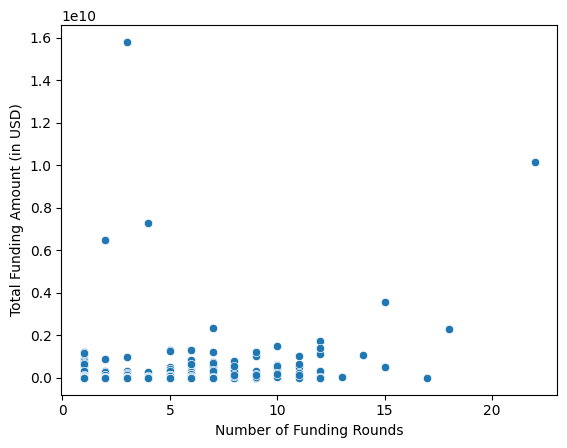

In [60]:
import seaborn as sns
sns.scatterplot(data, y="Total Funding Amount (in USD)", x="Number of Funding Rounds")

In [61]:
inv_df = data.loc[200:500, investment]
inv_df

,Top 5 Investors,Investor Type,Investment Stage,Number of Portfolio Organizations,Number of Investments,Number of Diversity Investments,Number of Lead Investments,Number of Exits (IPO),Accelerator Program Type,Accelerator Application Deadline,Accelerator Duration (in weeks),Number of Lead Investors,Number of Investors
200,NaN,NaN,NaN,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,"Techstars, Y Combinator, 7percent Ventures, Si...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
203,"Future Energy Ventures, Blue Earth Capital",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
204,"YZR Capital, IFB Innovationsstarter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,Motion Fashion Network Europe GmbH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
comma_seperated_categories = [
    'Industry Groups',
    'Headquarters Location', 
    'Top 5 Investors',
]

In [63]:
ordinal_categories = [
    'Number of Employees', 'Estimated Revenue Range', 
]

In [64]:
one_hot_categories = [
    'Company Type', 'Actively Hiring', 'Number of Founders', 'IPO Status', 'Acquired by', 
    'LinkedIn', 'Website', 'Twitter', 'Facebook', 'Phone Number', 'Contact Email', "Hub Tags"
]

In [65]:
numerical_features = [
    'Founded Date', 'Exit Date', 'Closed Date', 'Number of Exits', 'Number of Sub-Orgs',
    'Number of Articles',
    'Number of Lead Investors', 'Number of Investors'
]

In [67]:
data.columns

Index(['Organization Name', 'Organization Name URL', 'IPO Status',
       'Company Type', 'Last Funding Type', 'Industries',
       'Headquarters Location', 'Founded Date', 'Founded Date Precision',
       'Full Description', 'Description', 'Last Funding Date',
       'Total Funding Amount', 'Total Funding Amount Currency',
       'Total Funding Amount (in USD)', 'CB Rank (Company)',
       'Operating Status', 'Top 5 Investors', 'Most Recent Valuation Range',
       'LinkedIn', 'Headquarters Regions', 'Website', 'Industry Groups',
       'Number of Employees', 'Estimated Revenue Range', 'Last Funding Amount',
       'Last Funding Amount Currency', 'Last Funding Amount (in USD)',
       'Acquired by', 'Acquired by URL', 'Exit Date', 'Exit Date Precision',
       'Founders', 'Postal Code', 'Diversity Spotlight (US Headquarters Only)',
       'Closed Date', 'Closed Date Precision', 'Twitter', 'Facebook',
       'Phone Number', 'Contact Email', 'Number of Articles', 'Hub Tags',
       'Act

In [99]:
y = [
    'Pre-Seed', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Private Equity', 'Last Funding Amount Currency', 'Last Funding Amount', 'Last Funding Amount (in USD)', 'Total Funding Amount', 'Total Funding Amount (in USD)'
]

In [100]:
temp = data.loc[:, y]

In [102]:
temp = temp.dropna(axis=0, how="all")

In [105]:
valid_points = list(temp.index)

In [107]:
new_data = data.iloc[valid_points, :]

In [1]:
new_data.to_csv("../raw_data/new_data.csv")

NameError: name 'new_data' is not defined

In [92]:
temtemp = pd.DataFrame(data['Total Funding Amount (in USD)']/data['Total Funding Amount'])
temtemp.nunique()

0    1416
dtype: int64